In [65]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances
from glob import glob
import matplotlib.pyplot as plt

In [5]:
csvs = glob('/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/*.csv')
csvs

['/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000003.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000005.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000006.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000008.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000002.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000001.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000000.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/itrp_tpm_combination_0000000007.pkl.score.csv',
 '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-IT

In [6]:
dfs = []
for csv in csvs:
    df = pd.read_csv(csv, index_col=0)
    dfs.append(df)

In [53]:
df = pd.concat(dfs)
df['mean'] = df.prc*0.6 + df.roc*0.4
df = df.sort_values('mean', ascending=False)
df = df[(df.roc > 0.62) & (df.prc > 0.60)]

In [55]:
df1 = df
df2 = pd.DataFrame(df1.index.map(lambda x:x.split(' - ')).tolist(), index=df1.index)
df2.columns = ['g1', 'g2']
df1 = df1.join(df2)
df1['g1_count'] = df1.g1.map(df1.g1.value_counts())
df1['g2_count'] = df1.g2.map(df1.g2.value_counts())
df1

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
IKZF3 - CD200R1,0.642461,0.701119,0.665924,IKZF3,CD200R1,397,6
IKZF3 - APAF1,0.643418,0.697431,0.665023,IKZF3,APAF1,397,2
SMPD2 - PCDHGA6,0.646717,0.686406,0.662592,SMPD2,PCDHGA6,21,16
DEFB110 - SFTPA2,0.683113,0.630282,0.661981,DEFB110,SFTPA2,1,26
PIK3CD - RER1,0.641711,0.692111,0.661871,PIK3CD,RER1,63,6
...,...,...,...,...,...,...,...
IL2RG - WASHC3,0.600596,0.621909,0.609121,IL2RG,WASHC3,4,3
ZHX2 - WDFY3,0.601115,0.621127,0.609120,ZHX2,WDFY3,1,20
CD28 - CTSC,0.600456,0.621348,0.608812,CD28,CTSC,3,4


In [57]:
df1.g1.unique().shape

(268,)

In [58]:
df1.g2.unique().shape

(804,)

In [67]:
df1[df1.g1=='IL6R']

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
IL6R - CTNNA1,0.639905,0.678000,0.655143,IL6R,CTNNA1,74,16
IL6R - SMAD5,0.625370,0.689054,0.650844,IL6R,SMAD5,74,17
IL6R - RER1,0.627651,0.679235,0.648285,IL6R,RER1,74,6
IL6R - WDFY3,0.624518,0.681589,0.647346,IL6R,WDFY3,74,20
IL6R - OXR1,0.622721,0.676372,0.644181,IL6R,OXR1,74,3
...,...,...,...,...,...,...,...
IL6R - AIMP1,0.600683,0.638071,0.615638,IL6R,AIMP1,74,1
IL6R - TM9SF4,0.604791,0.631670,0.615542,IL6R,TM9SF4,74,1
IL6R - ETF1,0.605667,0.628516,0.614807,IL6R,ETF1,74,2


In [13]:
import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.correlation import pairwise_correlation
from gdd.combination import pairwise_combination
from gdd.score import Xy_score
from gdd.plot import plot_batch
BEST = ['PIK3CD', 'TOLLIP']
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/6575/'

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
itrp_tpm_crt = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE.CORRECT'))

tcga_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.TCGA.TABLE'))
tcga_patient['cohort'] = tcga_patient.cancer_type
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))

dfp1 = itrp_tpm.join(itrp_patient.cohort)
dfp2 = tcga_tpm.join(tcga_patient.cohort)
dfp2 = dfp2[dfp2.cohort == 'TCGA-SKCM']
dfp = pd.concat([dfp1, dfp2])

/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/was966/micromamba/envs/RNA/lib/python3.11/site-packages/umap/distanc

100%|##########| 1/1 [00:00<00:00, 817.60it/s]


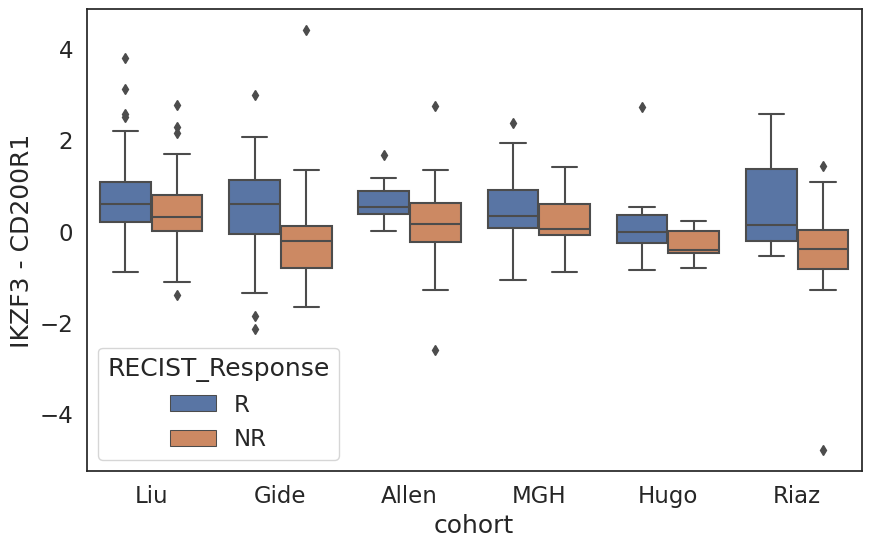

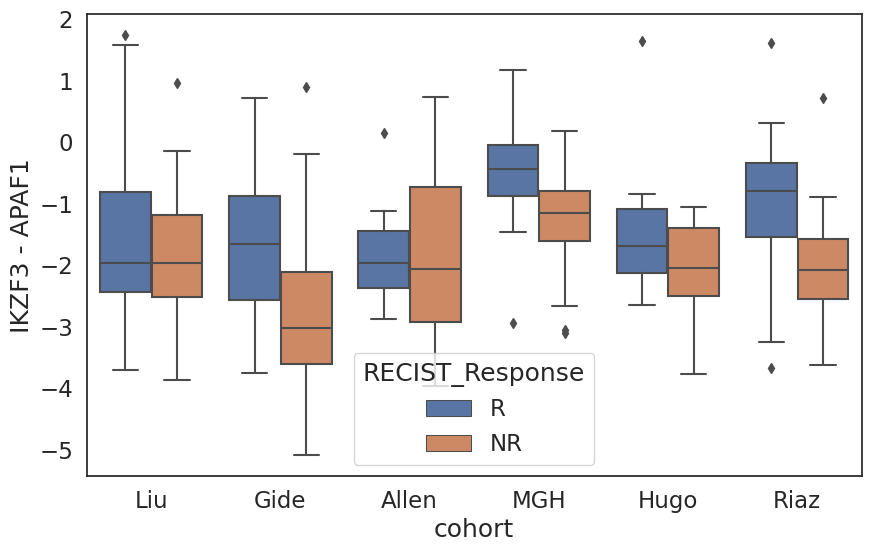

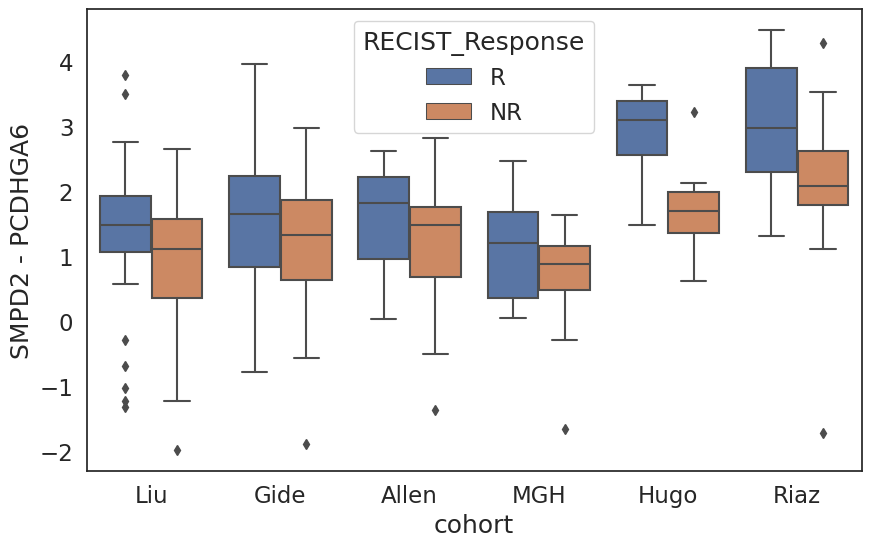

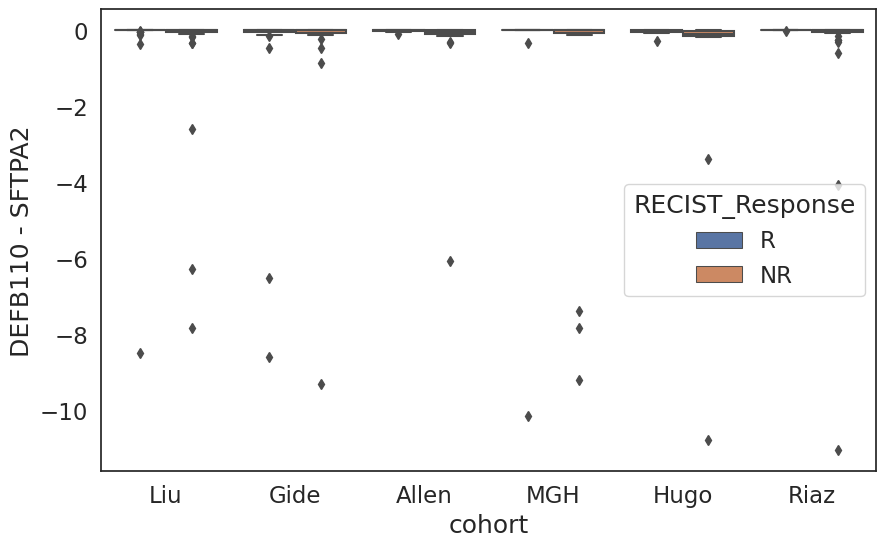

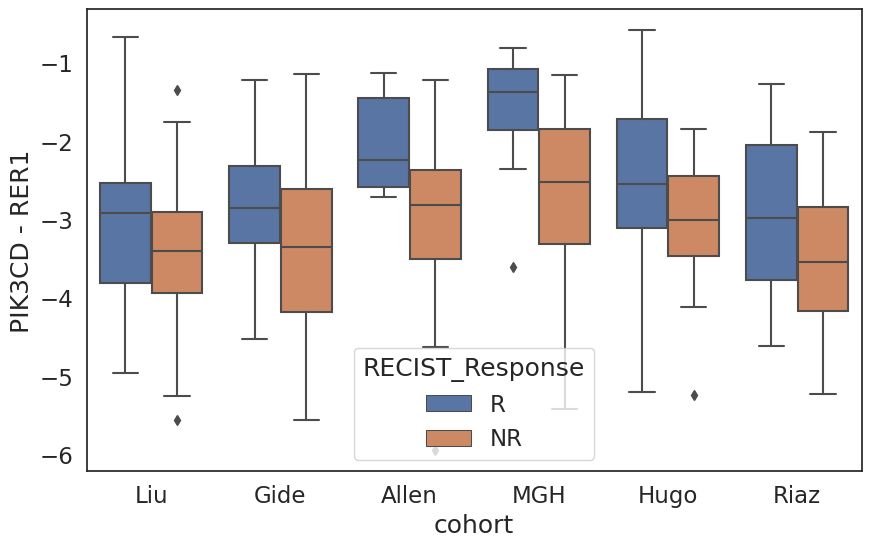

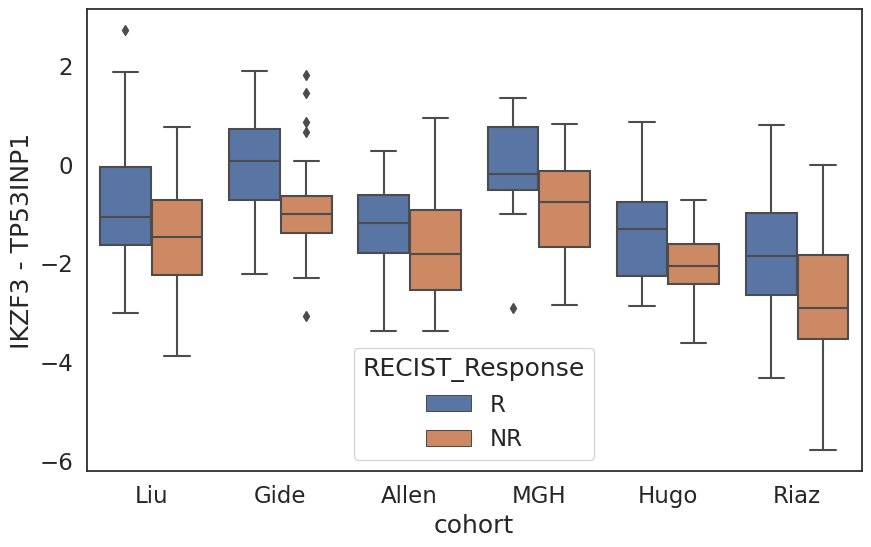

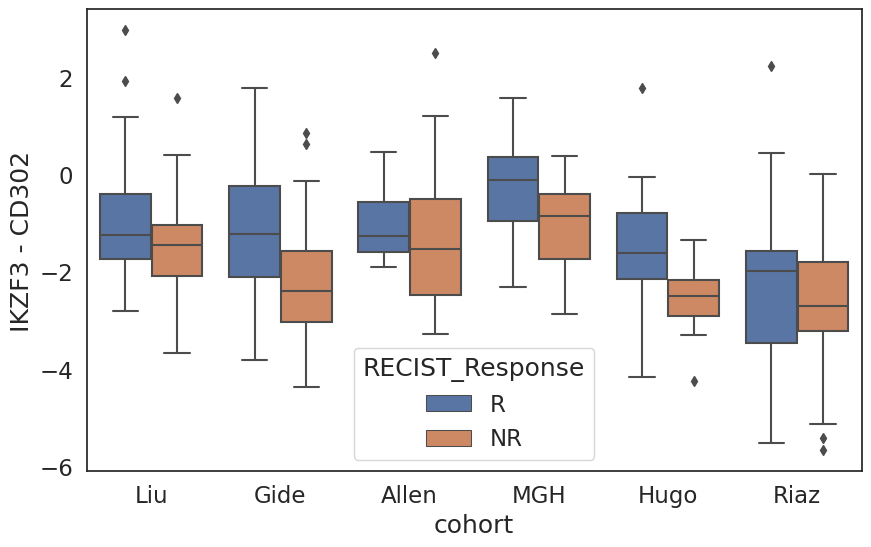

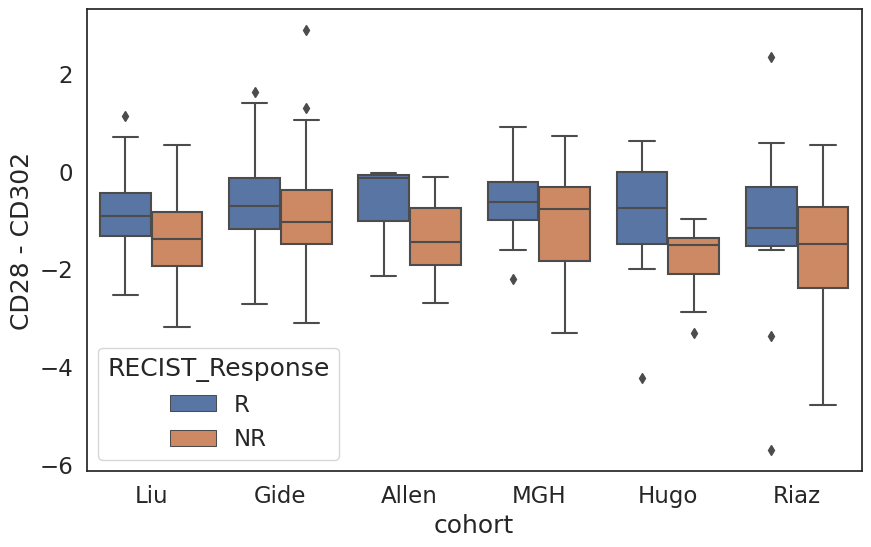

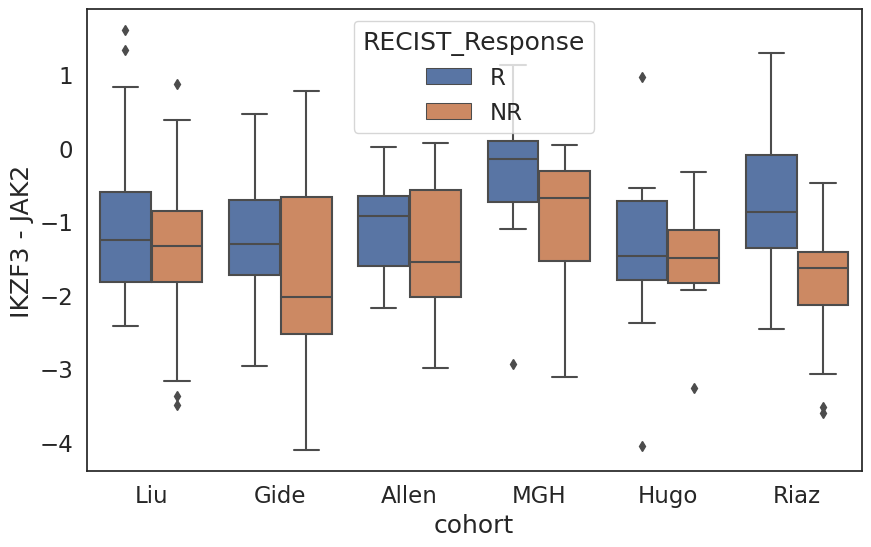

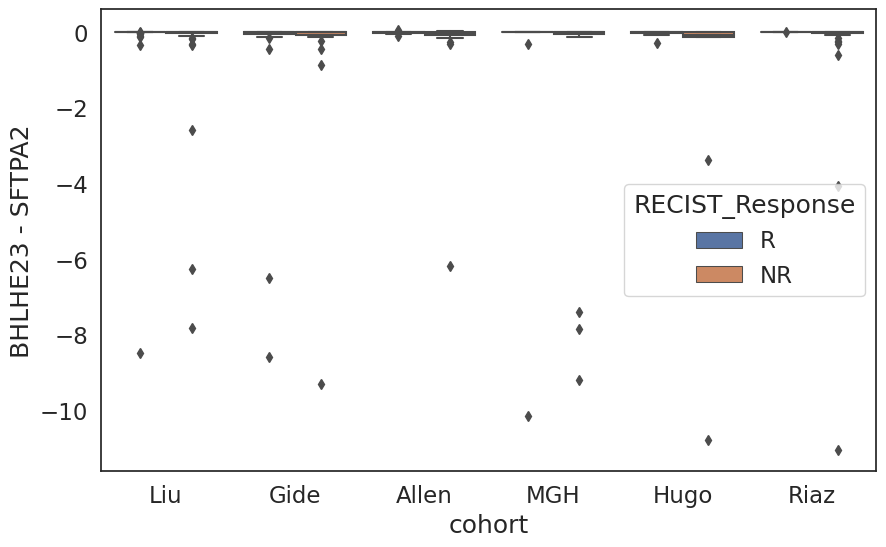

In [66]:
y_col = 'RECIST_Response'
for mk in df1.index[:10]:
    marker = mk.split(' - ')
    cohort_label = itrp_patient[['cohort', y_col]]
    pc = pairwise_combination(combination_pairs = [marker])
    marker_feature = pc.fit(itrp_tpm).transform()
    
    fname = marker_feature.columns[0]
    dfpp = marker_feature.join(cohort_label)
    dfpp = dfpp.dropna()
    fig,ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
    roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
    prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
    roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 706.23it/s]


,,roc,prc
cohort,gene_name,,
Allen,DEFB110 - SFTPA2,0.695266,0.644718
Gide,DEFB110 - SFTPA2,0.620773,0.805242
Hugo,DEFB110 - SFTPA2,0.723214,0.763703
Liu,DEFB110 - SFTPA2,0.537694,0.635641
MGH,DEFB110 - SFTPA2,0.580357,0.664594
Riaz,DEFB110 - SFTPA2,0.624390,0.584780


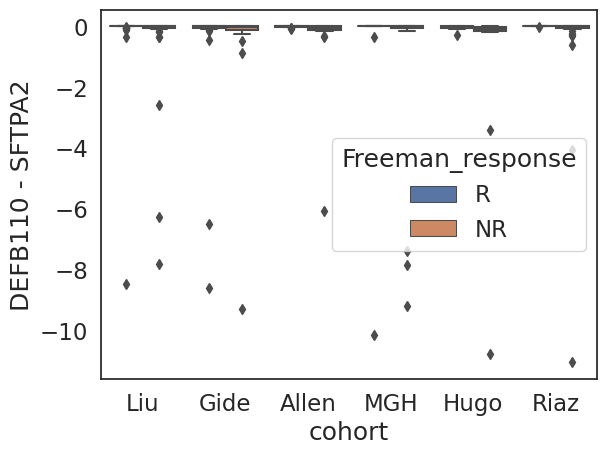

In [28]:
marker = ('DEFB110', 'SFTPA2') #MAP4K1 - AGER 
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1030.04it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


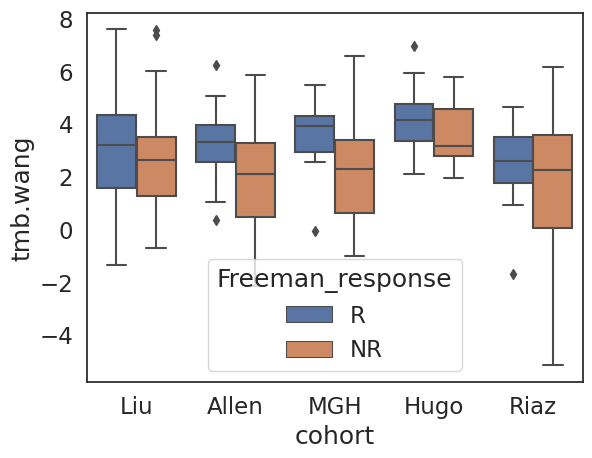

In [66]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1203.19it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


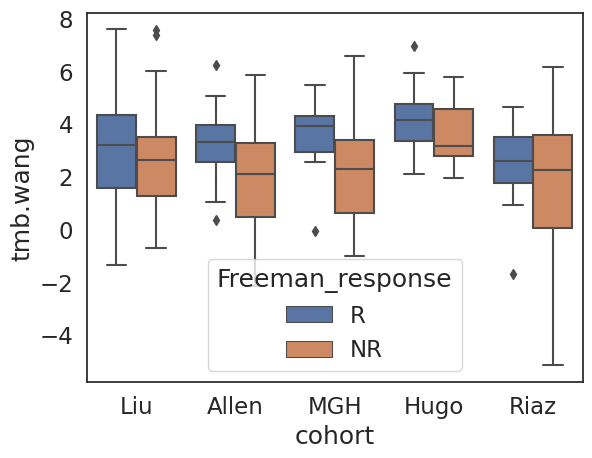

In [39]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()

sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1033.84it/s]


,,roc,prc
cohort,gene_name,,
Allen,PDCD1,0.569124,0.189959
Gide,PDCD1,0.764773,0.791750
Hugo,PDCD1,0.523810,0.508611
Liu,PDCD1,0.512044,0.421474
MGH,PDCD1,0.482143,0.452914
Riaz,PDCD1,0.647436,0.403527


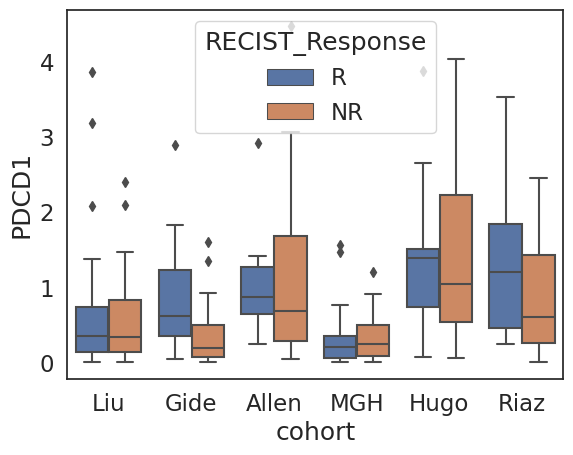

In [42]:
y_col = 'RECIST_Response'
marker_feature = itrp_tpm[['PDCD1']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 868.39it/s]


,,roc,prc
cohort,gene_name,,
Allen,CTLA4 - TNFSF4,0.692308,0.454082
Gide,CTLA4 - TNFSF4,0.704509,0.797291
Hugo,CTLA4 - TNFSF4,0.511905,0.513605
Liu,CTLA4 - TNFSF4,0.561715,0.519186
MGH,CTLA4 - TNFSF4,0.455357,0.353994
Riaz,CTLA4 - TNFSF4,0.578049,0.275657


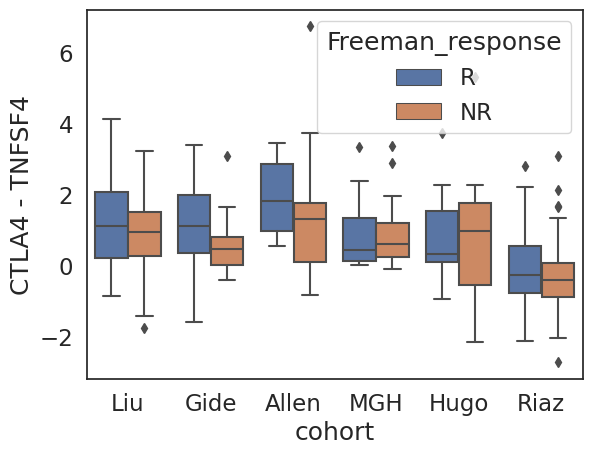

In [44]:
marker = ('CTLA4', 'TNFSF4') #MAP4K1 - AGER
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

In [ ]:
CD274 (PD-L1) expression, GEP, CYT, IMPRES, TIDE, and MHCII.7